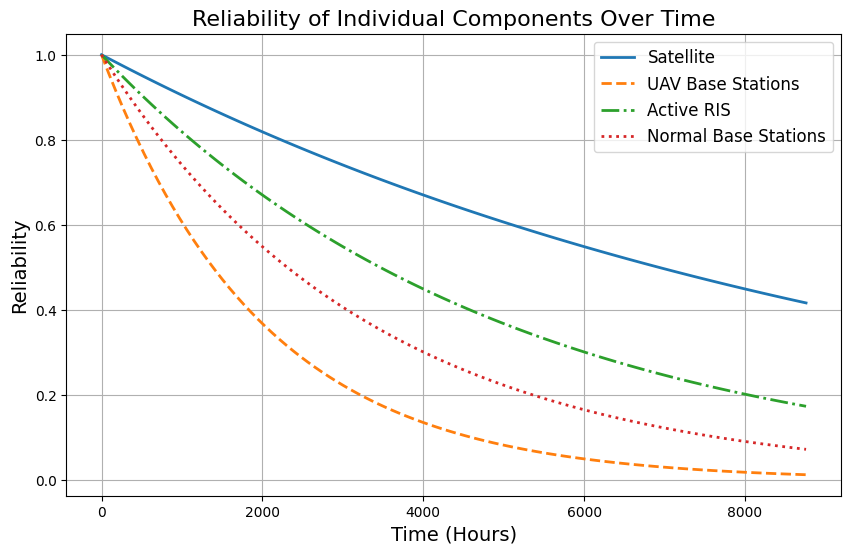

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
time_intervals = np.linspace(0, 8760, 100)
lambda_satellite = 0.0001
lambda_uav = 0.0005
lambda_ris = 0.0002
lambda_bs = 0.0003

# Individual reliability functions
R_satellite = np.exp(-lambda_satellite * time_intervals)
R_uav = np.exp(-lambda_uav * time_intervals)
R_ris = np.exp(-lambda_ris * time_intervals)
R_bs = np.exp(-lambda_bs * time_intervals)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_intervals, R_satellite, label="Satellite", linewidth=2)
plt.plot(time_intervals, R_uav, label="UAV Base Stations", linestyle='--', linewidth=2)
plt.plot(time_intervals, R_ris, label="Active RIS", linestyle='-.', linewidth=2)
plt.plot(time_intervals, R_bs, label="Normal Base Stations", linestyle=':', linewidth=2)

# Graph details
plt.title("Reliability of Individual Components Over Time", fontsize=16)
plt.xlabel("Time (Hours)", fontsize=14)
plt.ylabel("Reliability", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

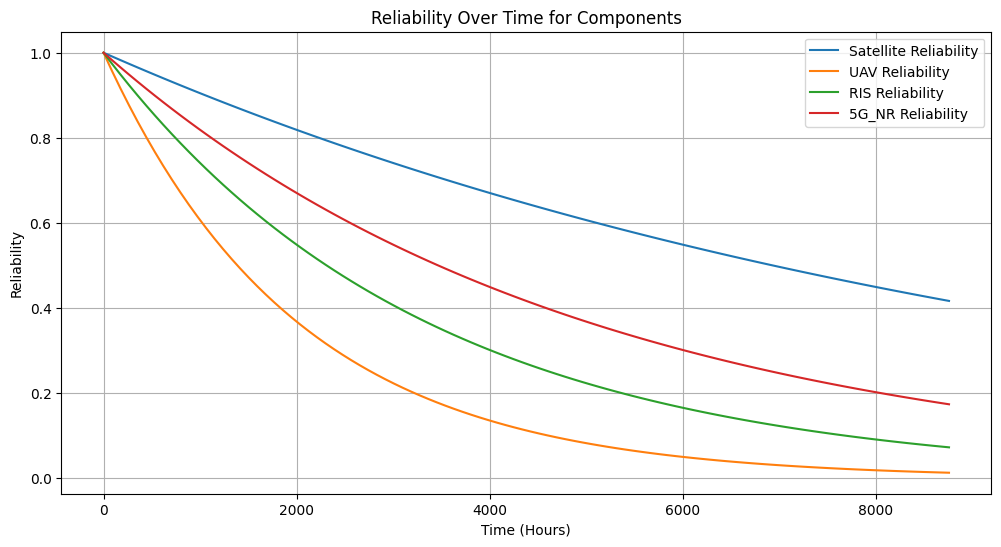

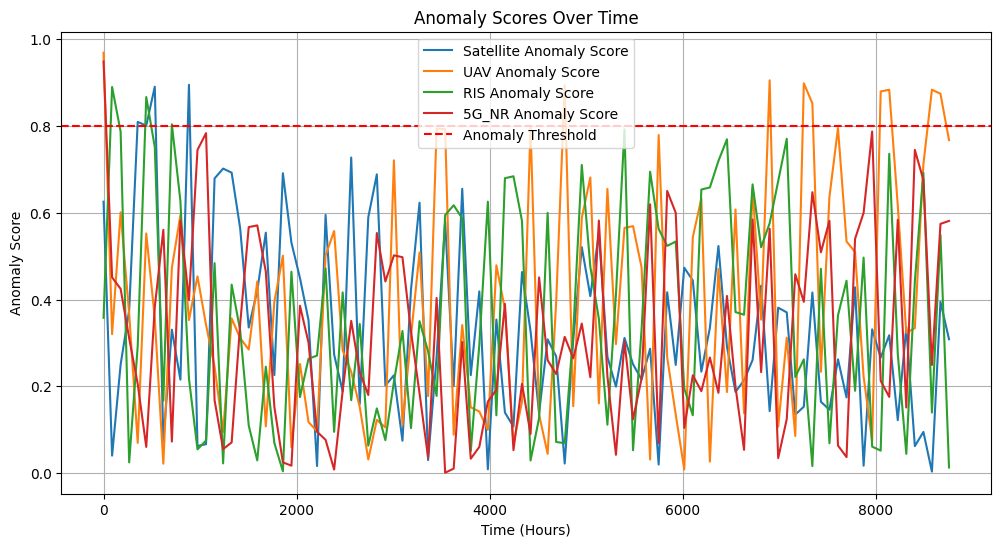

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
time_intervals = np.linspace(0, 8760, 100)
lambda_values = {
    "Satellite": 0.0001,
    "UAV": 0.0005,
    "RIS": 0.0003,
    "5G_NR": 0.0002,
}
thresholds = {
    "Satellite": 0.8,
    "UAV": 0.6,
    "RIS": 0.7,
    "5G_NR": 0.75,
}

# Reliability function R_i(t)
def reliability(lambda_i, t):
    return np.exp(-lambda_i * t)

# Generate anomaly scores (randomized for simulation purposes)
np.random.seed(42)
def anomaly_score(reliability):
    return np.abs(reliability - np.random.uniform(0, 1))

# Simulate reliability and anomalies over time for each component type
results = {}
for component, lambda_value in lambda_values.items():
    reliabilities = reliability(lambda_value, time_intervals)
    anomalies = [anomaly_score(r) for r in reliabilities]
    results[component] = {
        "reliabilities": reliabilities,
        "anomalies": anomalies,
        "detections": [1 if a > thresholds[component] else 0 for a in anomalies],
    }

# Plotting results
plt.figure(figsize=(12, 6))
for component in results.keys():
    plt.plot(time_intervals, results[component]["reliabilities"], label=f"{component} Reliability")
plt.title("Reliability Over Time for Components")
plt.xlabel("Time (Hours)")
plt.ylabel("Reliability")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for component in results.keys():
    plt.plot(time_intervals, results[component]["anomalies"], label=f"{component} Anomaly Score")
plt.axhline(y=thresholds["Satellite"], color="r", linestyle="--", label="Anomaly Threshold")
plt.title("Anomaly Scores Over Time")
plt.xlabel("Time (Hours)")
plt.ylabel("Anomaly Score")
plt.legend()
plt.grid(True)
plt.show()


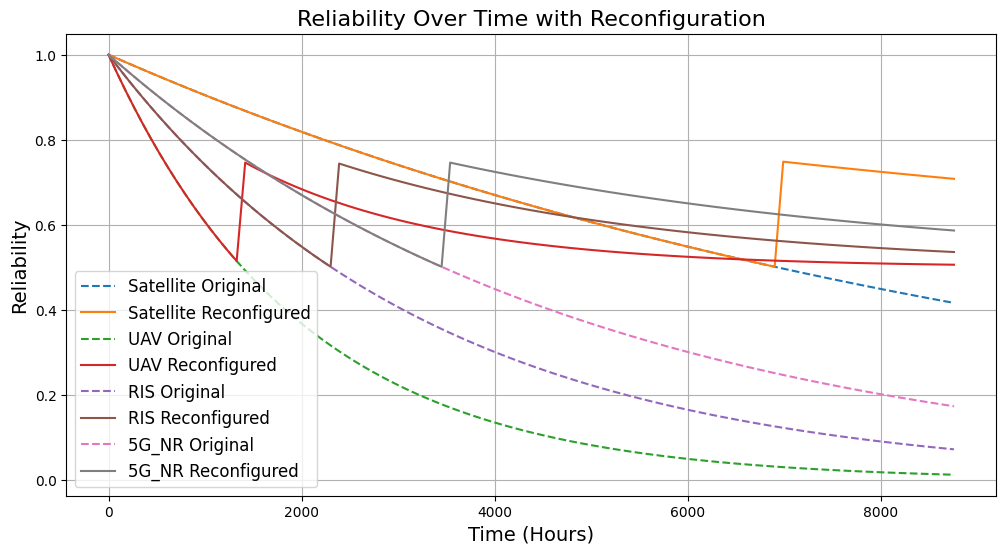

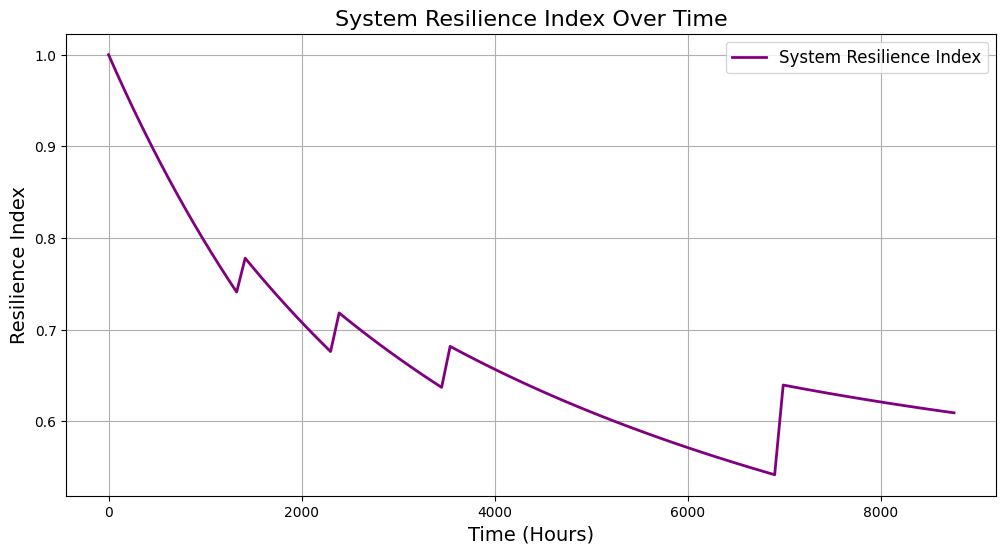

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
time_intervals = np.linspace(0, 8760, 100)  # Total simulation time (1 year) divided into 100 intervals
lambda_values = {
    "Satellite": 0.0001,
    "UAV": 0.0005,
    "RIS": 0.0003,
    "5G_NR": 0.0002,
}
reconfiguration_costs = {
    "Satellite": 2,   # Arbitrary cost units for reconfiguration
    "UAV": 5,
    "RIS": 3,
    "5G_NR": 4,
}
weights = {
    "Satellite": 0.4,  # Importance weights for each component
    "UAV": 0.2,
    "RIS": 0.2,
    "5G_NR": 0.2,
}

# Reliability function R_i(t)
def reliability(lambda_i, t):
    return np.exp(-lambda_i * t)

# Reconfiguration function (simplified)
def reconfigure(component, reliability, threshold=0.5):
    if reliability < threshold:
        return reliability + (1 - reliability) * 0.5  # Improve reliability by 50%
    return reliability

# Simulate reliability and reconfiguration over time
results = {}
for component, lambda_value in lambda_values.items():
    reliabilities = reliability(lambda_value, time_intervals)
    reconfigured_reliabilities = []

    for r in reliabilities:
        if r < 0.6:  # Trigger reconfiguration if reliability drops below threshold
            r = reconfigure(component, r)
        reconfigured_reliabilities.append(r)

    results[component] = {
        "original_reliabilities": reliabilities,
        "reconfigured_reliabilities": reconfigured_reliabilities,
    }

# Plotting results
plt.figure(figsize=(12, 6))
for component in results.keys():
    plt.plot(time_intervals, results[component]["original_reliabilities"], linestyle='--', label=f"{component} Original")
    plt.plot(time_intervals, results[component]["reconfigured_reliabilities"], label=f"{component} Reconfigured")

plt.title("Reliability Over Time with Reconfiguration", fontsize=16)
plt.xlabel("Time (Hours)", fontsize=14)
plt.ylabel("Reliability", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Calculate and plot system resilience index
system_resilience = []
for t in range(len(time_intervals)):
    resilience = sum(
        weights[component] * results[component]["reconfigured_reliabilities"][t]
        for component in results.keys()
    )
    system_resilience.append(resilience)

plt.figure(figsize=(12, 6))
plt.plot(time_intervals, system_resilience, label="System Resilience Index", color="purple", linewidth=2)
plt.title("System Resilience Index Over Time", fontsize=16)
plt.xlabel("Time (Hours)", fontsize=14)
plt.ylabel("Resilience Index", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()